<center>

## Final Exam 

### Data Mining, Machine Learning and Deep Learning

### [KAN - CDSCO1004U]
<center>

# Table of Contents
1. [Preprocessing](#Preprocessing)

## loading in necessary libaries

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from itertools import combinations
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras_tuner.tuners import RandomSearch
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.svm import LinearSVC
from IPython.display import clear_output

# Personal imports
import helpers as hlp
from helpers import evaluate

## Overview

In [2]:
df = pd.read_csv("../data/heloc_dataset_v1.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10459 entries, 0 to 10458
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   RiskPerformance                     10459 non-null  object
 1   ExternalRiskEstimate                10459 non-null  int64 
 2   MSinceOldestTradeOpen               10459 non-null  int64 
 3   MSinceMostRecentTradeOpen           10459 non-null  int64 
 4   AverageMInFile                      10459 non-null  int64 
 5   NumSatisfactoryTrades               10459 non-null  int64 
 6   NumTrades60Ever2DerogPubRec         10459 non-null  int64 
 7   NumTrades90Ever2DerogPubRec         10459 non-null  int64 
 8   PercentTradesNeverDelq              10459 non-null  int64 
 9   MSinceMostRecentDelq                10459 non-null  int64 
 10  MaxDelq2PublicRecLast12M            10459 non-null  int64 
 11  MaxDelqEver                         10459 non-null  in

In [4]:
# Getting basic statistical details
df.describe()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
count,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,...,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000,10459.000000
mean,67.425758,184.205373,8.543455,73.843293,19.428052,0.042738,-0.142843,86.661536,6.762406,4.928291,...,32.166460,-0.325366,0.868152,0.812602,31.629888,39.158906,3.185008,0.976097,0.018071,62.079166
std,21.121621,109.683816,13.301745,38.782803,13.004327,2.513910,2.367397,25.999584,20.501250,3.756275,...,20.128634,6.067556,3.179304,3.143698,30.060140,42.101601,4.413173,4.060995,3.358135,27.711565
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,...,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,63.000000,118.000000,3.000000,52.000000,12.000000,0.000000,0.000000,87.000000,-7.000000,4.000000,...,20.000000,-7.000000,0.000000,0.000000,5.000000,-8.000000,2.000000,1.000000,0.000000,47.000000
50%,71.000000,178.000000,5.000000,74.000000,19.000000,0.000000,0.000000,96.000000,-7.000000,6.000000,...,31.000000,0.000000,1.000000,1.000000,25.000000,47.000000,3.000000,2.000000,0.000000,67.000000
75%,79.000000,249.500000,11.000000,95.000000,27.000000,1.000000,0.000000,100.000000,14.000000,7.000000,...,44.000000,1.000000,2.000000,2.000000,54.000000,79.000000,5.000000,3.000000,1.000000,82.000000
max,94.000000,803.000000,383.000000,383.000000,79.000000,19.000000,19.000000,100.000000,83.000000,9.000000,...,100.000000,24.000000,66.000000,66.000000,232.000000,471.000000,32.000000,23.000000,18.000000,100.000000


Three 'describing' values: 
- `-9` No Bureau Record or No Investigation 
- `-8` No Usable/Valid Trades or Inquires 
- `-7` Condition not Met
We can see that -9 is the lowest number of every column.

There are potential outliers, since max value often exceds the 75 percentlie

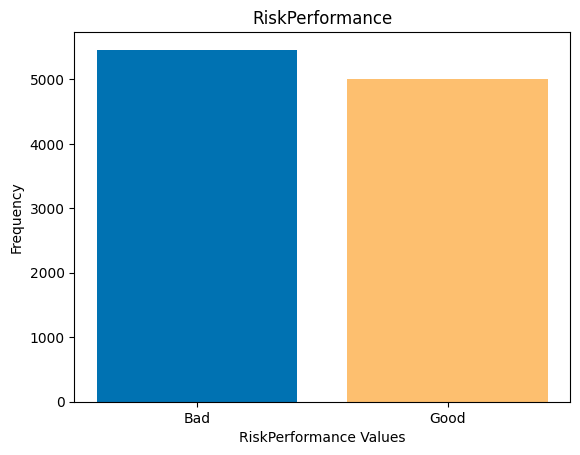

In [5]:
hlp.BarPlot(df['RiskPerformance'])

We can see that there is a good balance between Good and Bad, with 47.% Good and 52.2% Bad. 

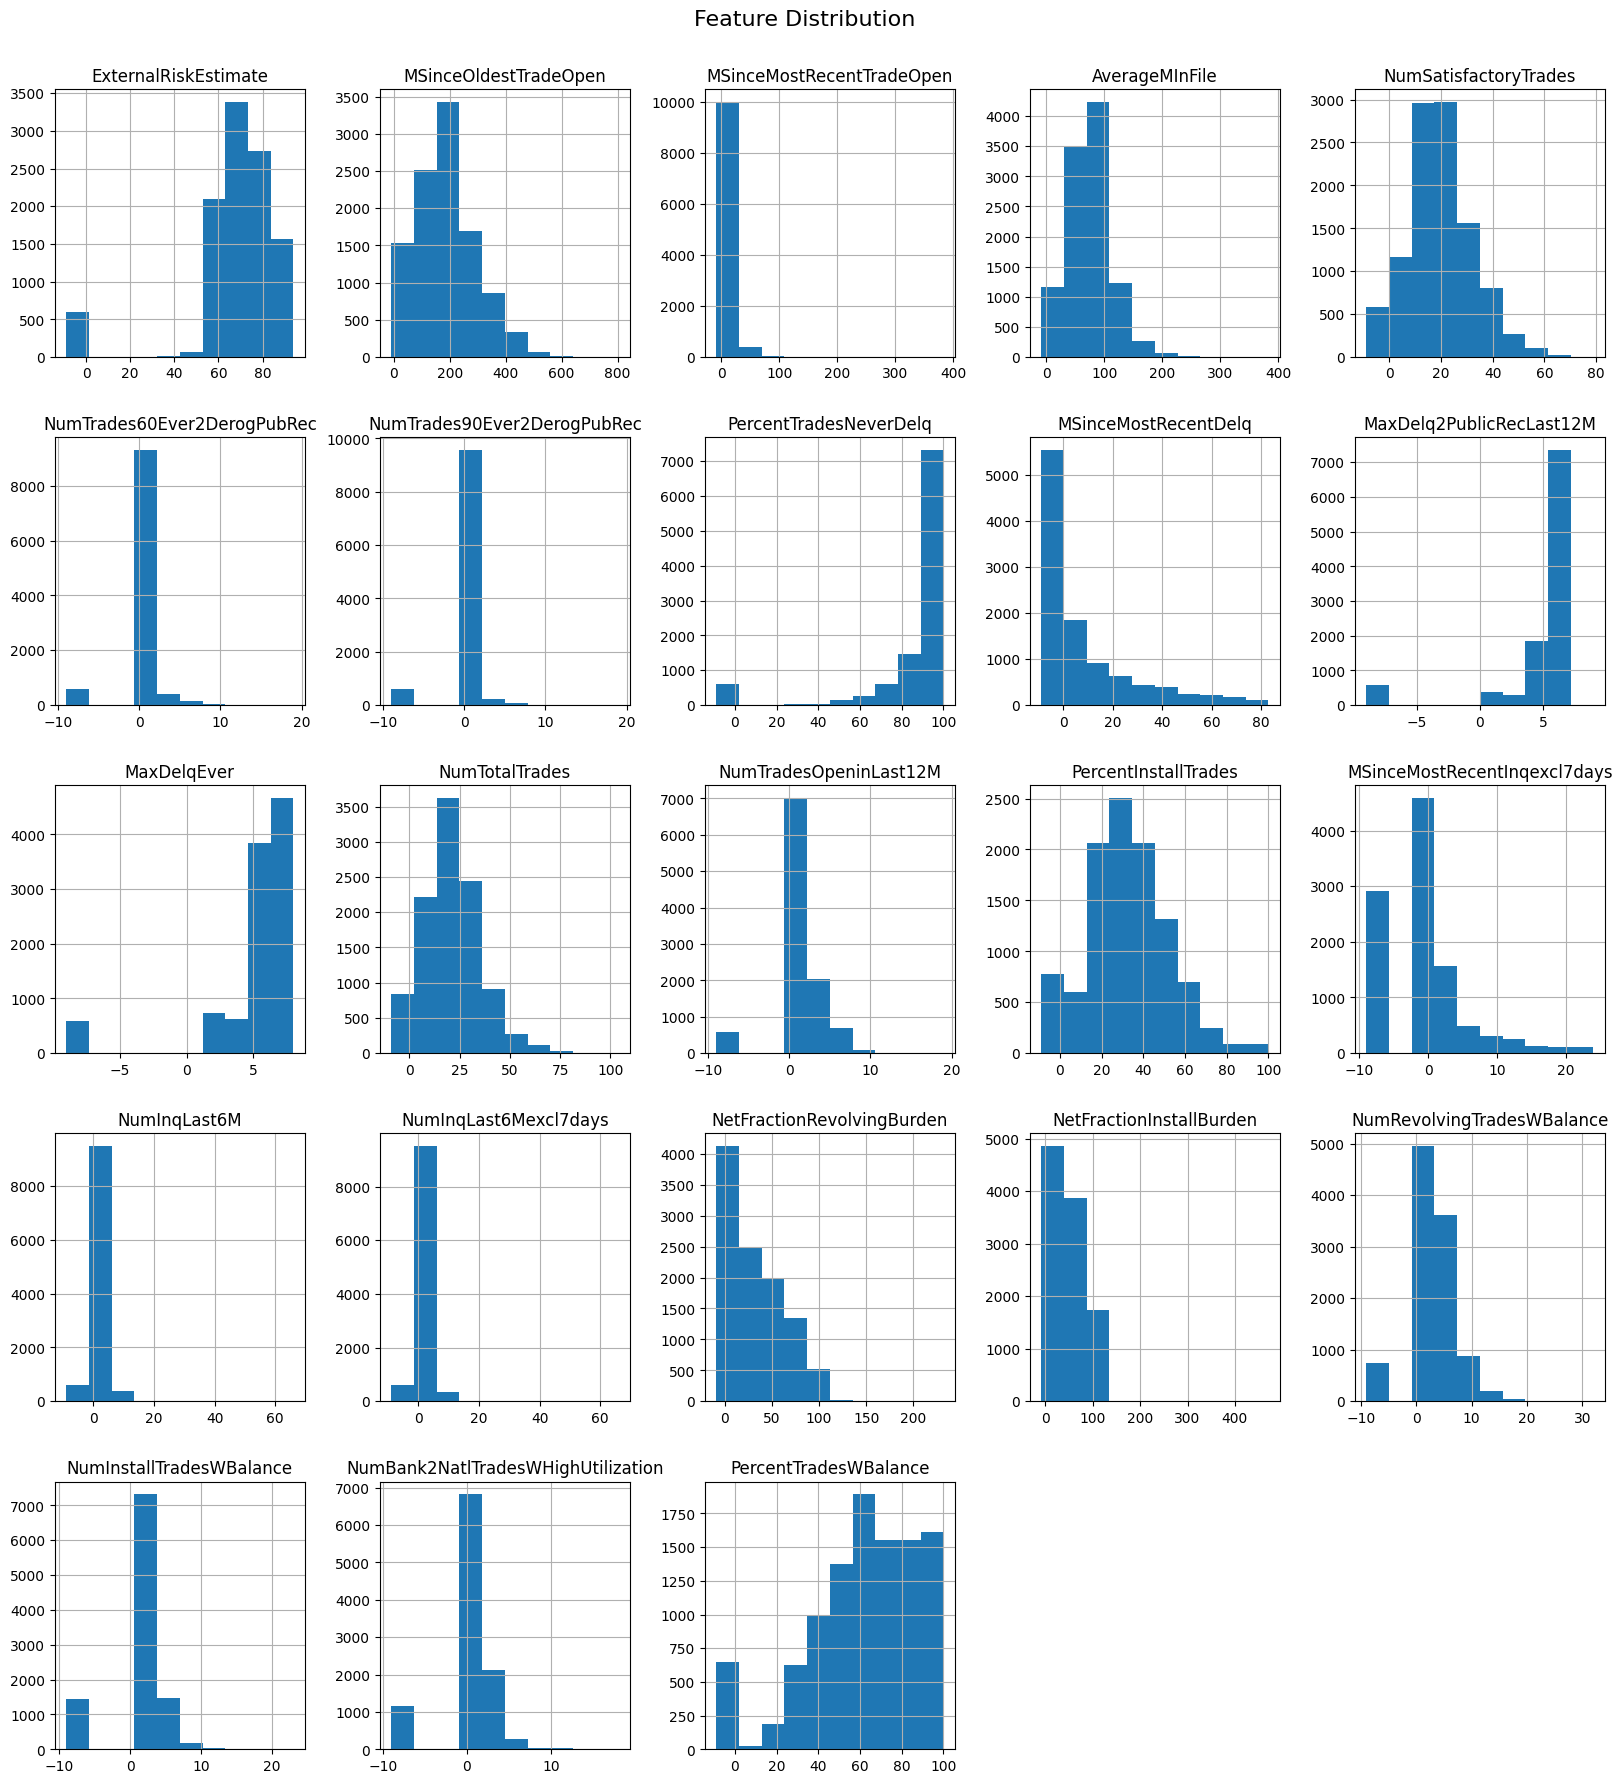

In [6]:
# Distribution with historgrams 
df.hist(bins=10, figsize=(20,20))

plt.suptitle('Feature Distribution', fontsize = 16)
plt.subplots_adjust(top = 0.94)
plt.show()

<a id='Preprocessing'></a>
# Preprocessing

In [7]:
# Label Encoder for 'RiskPerformance'
label = LabelEncoder()
df['RiskPerformance'] = label.fit_transform(df['RiskPerformance'])

In [8]:
#Detecting outliers
def detect_outliers(df):
    fig, axes = plt.subplots(nrows=4, ncols=6, figsize=(25,10))
    fig.suptitle('Boxplots of all columns', fontsize=20)

    outliers = set()
    for i, col in enumerate(df.columns):
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        column_outliers = set(df[(df[col] < lower_bound) | (df[col] > upper_bound)].index)
        outliers = outliers.union(column_outliers)
        
        # Plot boxplot in corresponding subplot
        ax = axes[i // 6][i % 6]
        ax.boxplot(df[col])
        ax.set_title(col)
        ax.scatter(list(column_outliers), df[col][list(column_outliers)], color='r')
    return outliers

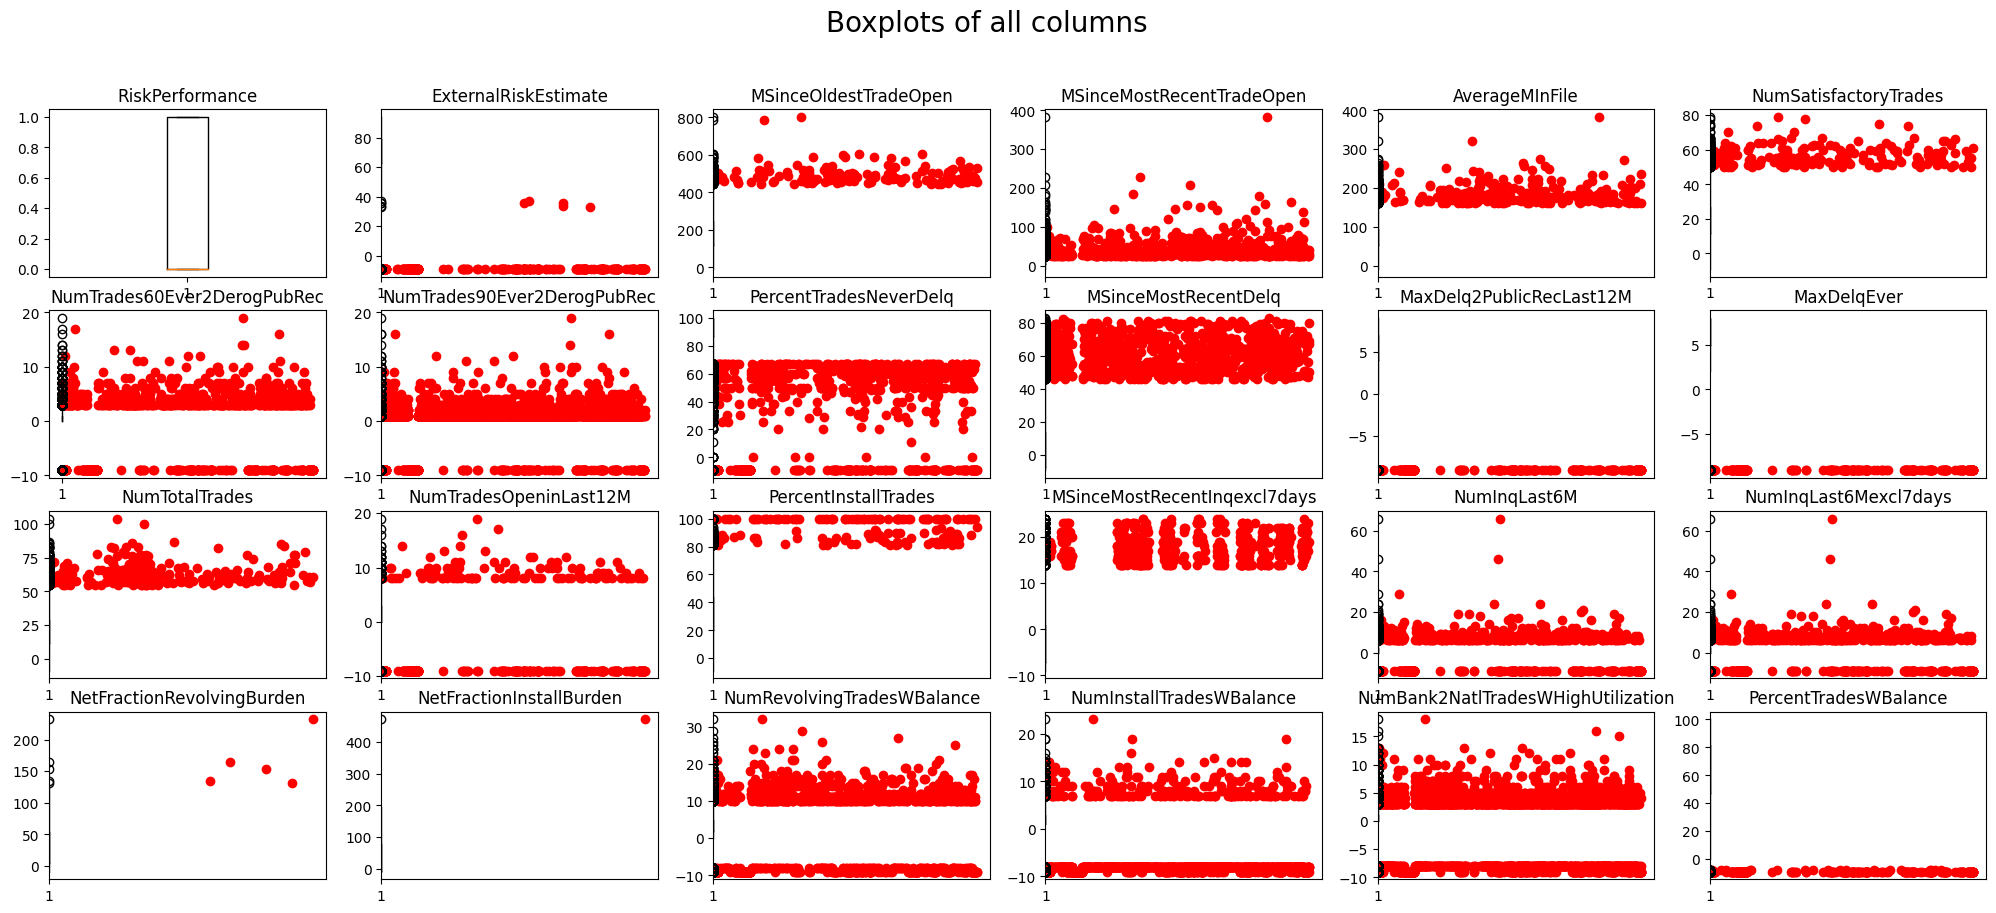

In [9]:
# Only works after label encoder
outliers = detect_outliers(df)
plt.show()

The red dots indicates wheter there are outliers for the given variable. It seems to be alot of outliers, but this is not the best indications. Due to the desribing minus values, as mentioned earlier, alot of outliers are detected for every column. But we do see that there are possibly some outliers for columns like: 
- `NetFractionRevolvingBurden`
- `NetFractionInstallBurden`
- `MSinceMostRecentTradeOpen` 
- `NumInqLast6M`

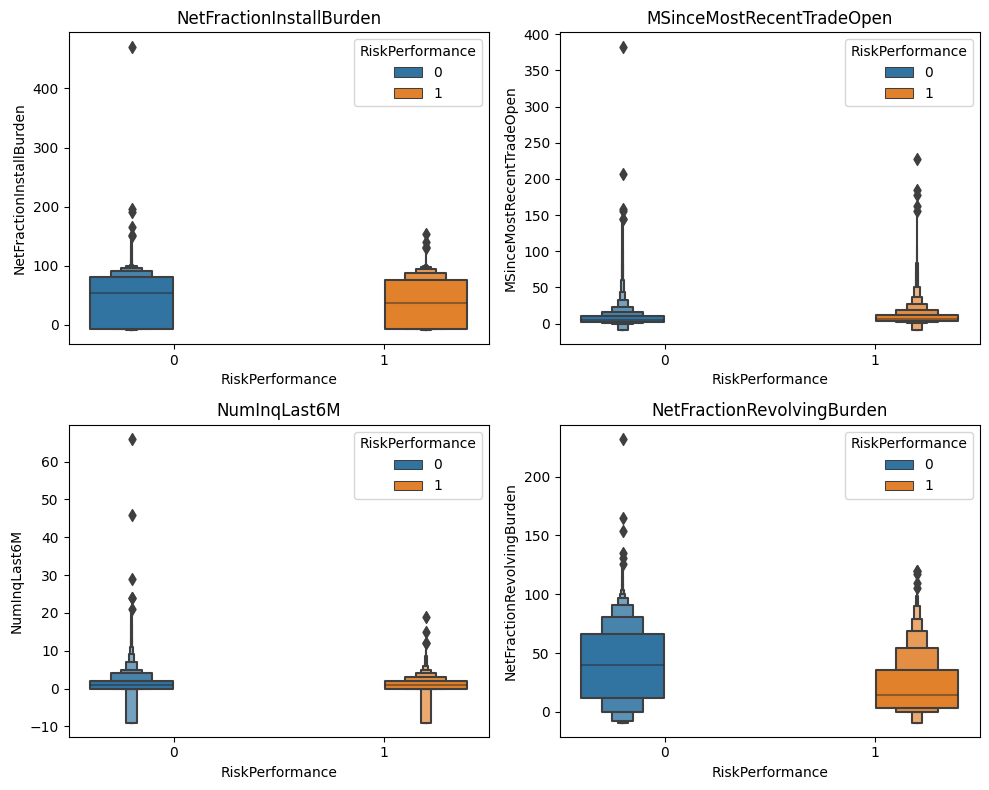

In [10]:
# Plotting the mentioned columns

# Create a figure and subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Plot the first boxplot
sns.boxenplot(x='RiskPerformance', y='NetFractionInstallBurden', hue='RiskPerformance', data=df, ax=axes[0, 0])
axes[0, 0].set_title('NetFractionInstallBurden')

# Plot the second boxplot
sns.boxenplot(x='RiskPerformance', y='MSinceMostRecentTradeOpen', hue='RiskPerformance', data=df, ax=axes[0, 1])
axes[0, 1].set_title('MSinceMostRecentTradeOpen')

# Plot the third boxplot
sns.boxenplot(x='RiskPerformance', y='NumInqLast6M', hue='RiskPerformance', data=df, ax=axes[1, 0])
axes[1, 0].set_title('NumInqLast6M')

# Plot the fourth boxplot
sns.boxenplot(x='RiskPerformance', y='NetFractionRevolvingBurden', hue='RiskPerformance', data=df, ax=axes[1, 1])
axes[1, 1].set_title('NetFractionRevolvingBurden')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
# Replacing Outliers with Null values
for x in ['NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'MSinceMostRecentTradeOpen', 'NumInqLast6M']: 
    Q3, Q1 = np.percentile(df.loc[:,x], [75,25])
    IQR = Q3 - Q1

    Max = Q3+(1.5*IQR)
    Min = Q1-(1.5*IQR)

    # Data points thats outside of min or max bound with a NULL value 
    df.loc[df[x] < Min,x] = np.nan
    df.loc[df[x] > Max,x] = np.nan

# Dropping the null values
df.dropna(axis = 0, inplace = True)

In [12]:
# Extracting feature variables and target column
y = df.loc[:,'RiskPerformance']
X = df.drop(['RiskPerformance'], axis = 1)

# Scaling 
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [13]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<a id='mlmodels'></a>
# ML models

<a id='randomforest'></a>
## Random Forest

Random Forest
 Accuracy: 0.721

 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       893
           1       0.74      0.67      0.70       852

    accuracy                           0.72      1745
   macro avg       0.72      0.72      0.72      1745
weighted avg       0.72      0.72      0.72      1745

 Confusion Matrix:


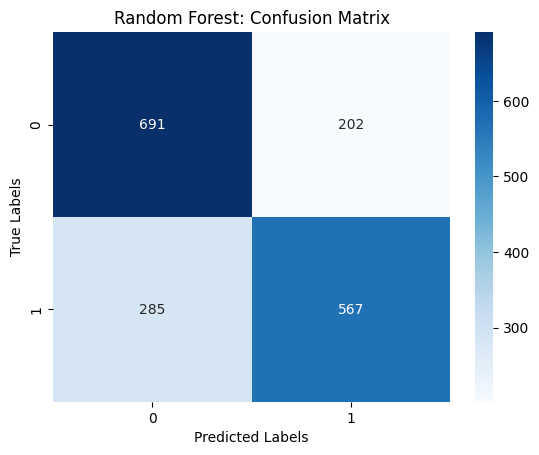

In [30]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=30, random_state=9)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate the rf
evaluate(y_test, y_pred_rf, "Random Forest")

<a id='neuralnetwork'></a>
## Neural Network

55/55 [==============================] - 0s 392us/step
Neural Network
 Accuracy: 0.706

 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.73      0.72       893
           1       0.71      0.68      0.69       852

    accuracy                           0.71      1745
   macro avg       0.71      0.71      0.71      1745
weighted avg       0.71      0.71      0.71      1745

 Confusion Matrix:


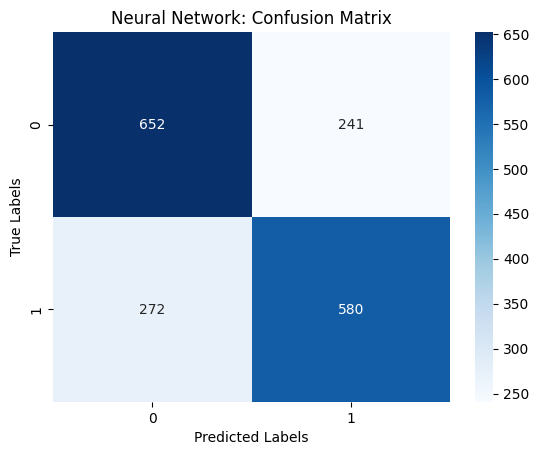

In [42]:
# Simple Neural Network
NN_simple_model = Sequential()
NN_simple_model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
NN_simple_model.add(Dropout(0.5))
NN_simple_model.add(Dense(128, activation='relu'))
NN_simple_model.add(Dropout(0.4))
NN_simple_model.add(Dense(64, activation='relu'))
NN_simple_model.add(Dropout(0.3))
NN_simple_model.add(Dense(1, activation='sigmoid'))

# Compile the model
NN_simple_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
NN_simple_model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)

# Predict with the model
y_pred_nn = (NN_simple_model.predict(X_test) > 0.5).astype("int32")

evaluate(y_test, y_pred_nn, "Neural Network")

## Neural Network (2)

55/55 [==============================] - 0s 426us/step
Neural Network
 Accuracy: 0.715

 Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       893
           1       0.71      0.70      0.71       852

    accuracy                           0.71      1745
   macro avg       0.71      0.71      0.71      1745
weighted avg       0.71      0.71      0.71      1745

 Confusion Matrix:


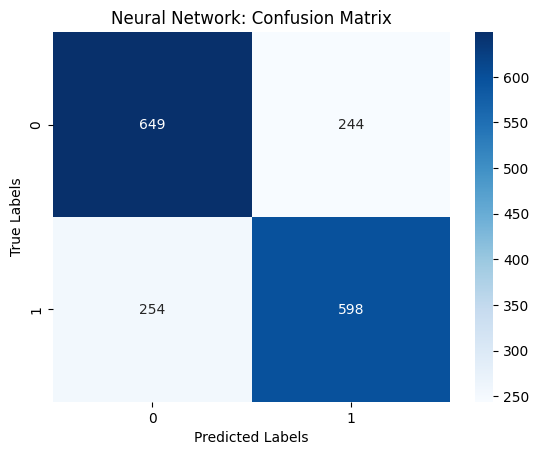

In [24]:
# Complex Neural Network
# Define the model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(rate=0.5))

# Add second hidden layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=0.5))

# Add third hidden layer
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.5))

# Add fourth hidden layer
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=0.5))

# Add fifth hidden layer
model.add(Dense(units=16, activation='relu'))
model.add(Dropout(rate=0.5))

# Add output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=64, verbose=0)

# Make predictions on the test data
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

evaluate(y_test, y_pred_nn, "Neural Network")


This block defines, compiles, and trains a simple neural network using the Keras library. The neural network has two hidden layers with ReLU activation functions and dropout for regularization. The output layer has a sigmoid activation function for binary classification. The model is compiled using the Adam optimizer and binary cross-entropy loss, and trained for 100 epochs with a batch size of 64.

## Logistic Regression

Logistic Regression
 Accuracy: 0.731

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       893
           1       0.73      0.71      0.72       852

    accuracy                           0.73      1745
   macro avg       0.73      0.73      0.73      1745
weighted avg       0.73      0.73      0.73      1745

 Confusion Matrix:


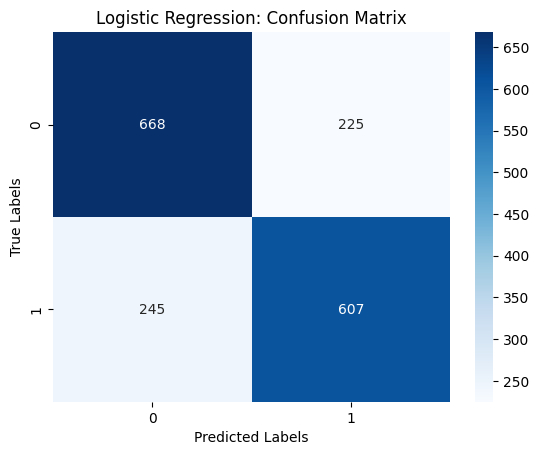

In [21]:
# Logistic Regression
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluation
evaluate(y_test, y_pred_lr, "Logistic Regression")

# SVM

SVM
 Accuracy: 0.732

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       893
           1       0.73      0.71      0.72       852

    accuracy                           0.73      1745
   macro avg       0.73      0.73      0.73      1745
weighted avg       0.73      0.73      0.73      1745

 Confusion Matrix:


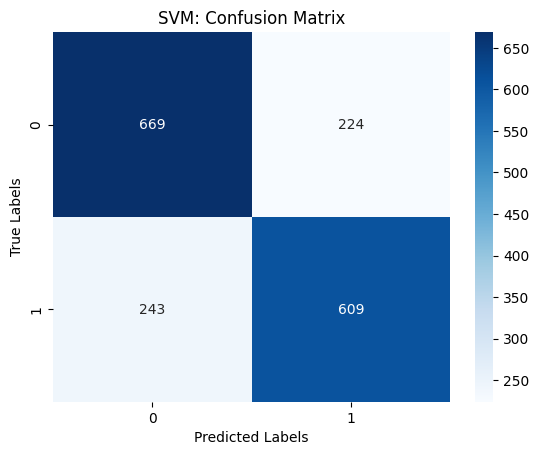

In [18]:
svmTuned = LinearSVC(max_iter = 1000000, random_state = 9)
svmTuned.fit(X_train, y_train)

y_pred_svm = svmTuned.predict(X_test)

evaluate(y_test, y_pred_svm, "SVM")

# Gridsearches

## Gridsearch for LR

In [23]:
# Define the parameter grid for Logistic Regression with l2 penalty
param_grid_lr_l2 = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 500, 5000, 50000, 100000]  # added larger max_iter
}

# Initialize the Logistic Regression classifier
lr = LogisticRegression()

# Set up the HalvingGridSearchCV for l2 penalty
grid_search_lr_l2 = HalvingGridSearchCV(estimator=lr, param_grid=param_grid_lr_l2, cv=5, n_jobs=-1, verbose=2, factor=2, min_resources='exhaust')

grid_search_lr_l2.fit(X_train, y_train)


# Clear the output of the Jupyter notebook
clear_output()


best_params_lr_l2 = grid_search_lr_l2.best_params_
print("Best parameters for Logistic Regression with l2 penalty:", best_params_lr_l2)

Best parameters for Logistic Regression with l2 penalty: {'C': 0.01, 'fit_intercept': True, 'max_iter': 100000, 'penalty': 'l2', 'solver': 'liblinear'}


Logistic Regression
 Accuracy: 0.732

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       893
           1       0.73      0.71      0.72       852

    accuracy                           0.73      1745
   macro avg       0.73      0.73      0.73      1745
weighted avg       0.73      0.73      0.73      1745

 Confusion Matrix:


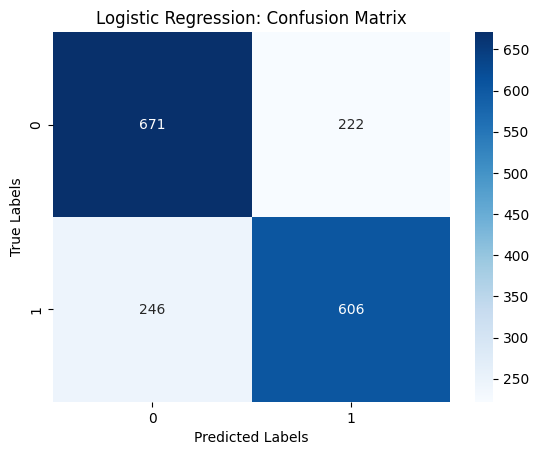

In [47]:
lr_opt = LogisticRegression(**best_params_lr_l2)

lr_opt.fit(X_train, y_train)
y_pred_lr = lr_opt.predict(X_test)

# Evaluation
evaluate(y_test, y_pred_lr, "Logistic Regression")

## Gridsearch for RF

In [48]:
# Define the parameter grid for the Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf = RandomForestClassifier()

# Set up the HalvingGridSearchCV
rf_opt = HalvingGridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2, factor=2, min_resources='exhaust')

# Fit the HalvingGridSearchCV to the data
rf_opt.fit(X_train, y_train)

# Get the best parameters
best_params_rf = rf_opt.best_params_
print("Best parameters for Random Forest:", best_params_rf)


n_iterations: 9
n_required_iterations: 10
n_possible_iterations: 9
min_resources_: 20
max_resources_: 6979
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 576
n_resources: 20
Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_featur

Random Forest
 Accuracy: 0.721

 Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       893
           1       0.73      0.68      0.70       852

    accuracy                           0.72      1745
   macro avg       0.72      0.72      0.72      1745
weighted avg       0.72      0.72      0.72      1745

 Confusion Matrix:


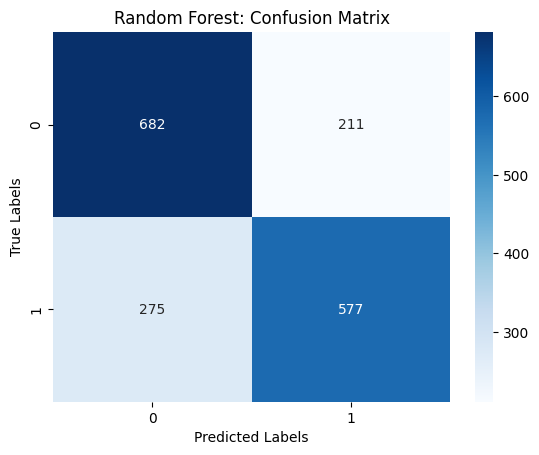

In [49]:
# Use the best estimator to make predictions on the test data
y_pred_rf = rf_opt.best_estimator_.predict(X_test)

#evaluation
evaluate(y_test, y_pred_rf, "Random Forest")

## Gridsearch for SVM

In [31]:
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 50],
    'loss': ['hinge', 'squared_hinge']
}

# Initialize the SVM classifier 
svm = LinearSVC(max_iter=500000)

# Set up the GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv = 5, verbose=2, n_jobs=-1)

# Fit the GridSearchCV to the data 
grid_search_svm.fit(X_train, y_train)

# Get the best parameters 
best_params_svm = grid_search_svm.best_params_
print('best parameters for SVM:', best_params_svm)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ..................................C=0.1, loss=hinge; total time=   0.0s
[CV] END ..................................C=0.1, loss=hinge; total time=   0.0s
[CV] END ..................................C=0.1, loss=hinge; total time=   0.0s
[CV] END ..................................C=0.1, loss=hinge; total time=   0.0s
[CV] END ..................................C=0.1, loss=hinge; total time=   0.1s
[CV] END ....................................C=1, loss=hinge; total time=   0.2s
[CV] END ....................................C=1, loss=hinge; total time=   0.2s
[CV] END ....................................C=1, loss=hinge; total time=   0.2s
[CV] END ....................................C=1, loss=hinge; total time=   0.2s
[CV] END ..........................C=0.1, loss=squared_hinge; total time=   0.5s
[CV] END ....................................C=1, loss=hinge; total time=   0.3s
[CV] END ..........................C=0.1, loss=sq

/Users/davidbellenberg/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................................C=10, loss=hinge; total time=   2.2s
[CV] END ...................................C=10, loss=hinge; total time=   1.2s


/Users/davidbellenberg/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................................C=10, loss=hinge; total time=   1.9s
[CV] END ............................C=1, loss=squared_hinge; total time=   4.1s


/Users/davidbellenberg/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................................C=50, loss=hinge; total time=   4.2s


/Users/davidbellenberg/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................................C=50, loss=hinge; total time=   4.3s
[CV] END ............................C=1, loss=squared_hinge; total time=   8.4s
[CV] END ............................C=1, loss=squared_hinge; total time=   9.3s


/Users/davidbellenberg/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................................C=50, loss=hinge; total time=   4.0s


/Users/davidbellenberg/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................................C=50, loss=hinge; total time=   4.8s
[CV] END ............................C=1, loss=squared_hinge; total time=   8.4s


/Users/davidbellenberg/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................................C=50, loss=hinge; total time=   4.9s
[CV] END ............................C=1, loss=squared_hinge; total time=   6.1s
[CV] END ...........................C=10, loss=squared_hinge; total time=  40.1s
[CV] END ...........................C=10, loss=squared_hinge; total time= 1.4min
[CV] END ...........................C=10, loss=squared_hinge; total time= 1.8min
[CV] END ...........................C=10, loss=squared_hinge; total time= 2.0min
[CV] END ...........................C=10, loss=squared_hinge; total time= 1.3min
[CV] END ...........................C=50, loss=squared_hinge; total time= 3.8min


/Users/davidbellenberg/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...........................C=50, loss=squared_hinge; total time= 4.4min


/Users/davidbellenberg/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/davidbellenberg/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...........................C=50, loss=squared_hinge; total time= 4.4min
[CV] END ...........................C=50, loss=squared_hinge; total time= 4.4min
[CV] END ...........................C=50, loss=squared_hinge; total time= 4.4min
best parameters for SVM: {'C': 0.1, 'loss': 'hinge'}


/Users/davidbellenberg/anaconda3/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM
 Accuracy: 0.727

 Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       893
           1       0.73      0.70      0.71       852

    accuracy                           0.73      1745
   macro avg       0.73      0.73      0.73      1745
weighted avg       0.73      0.73      0.73      1745

 Confusion Matrix:


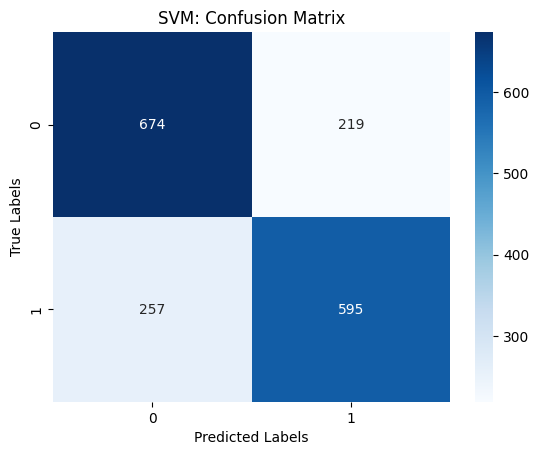

In [32]:
# USe the best estimator to make predictions on the test data 
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)

# Evaluating the model 
evaluate(y_test, y_pred_svm, "SVM")

## Gridsearch for NN

In [43]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout_3', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'sgd', 'rmsprop']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # how many model variations to test?
    executions_per_trial=3,  # how many trials per variation? (same model could perform differently)
    directory='model_dir',  
    project_name='tuning' 
)

tuner.search(x=X_train, y=y_train, epochs=50, validation_data=(X_test, y_test))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


INFO:tensorflow:Reloading Tuner from model_dir/tuning/tuner0.json
INFO:tensorflow:Oracle triggered exit


In [51]:
# Build the model with the optimal hyperparameters and train it on the data
nn_opt = tuner.hypermodel.build(best_hps)
history = nn_opt.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))


Epoch 1/50
219/219 [==============================] - 1s 1ms/step - loss: 0.6584 - accuracy: 0.6094 - val_loss: 0.6128 - val_accuracy: 0.7060
Epoch 2/50
219/219 [==============================] - 0s 1ms/step - loss: 0.6047 - accuracy: 0.6928 - val_loss: 0.5747 - val_accuracy: 0.7158
Epoch 3/50
219/219 [==============================] - 0s 886us/step - loss: 0.5814 - accuracy: 0.7150 - val_loss: 0.5621 - val_accuracy: 0.7203
Epoch 4/50
219/219 [==============================] - 0s 1ms/step - loss: 0.5747 - accuracy: 0.7107 - val_loss: 0.5570 - val_accuracy: 0.7295
Epoch 5/50
219/219 [==============================] - 0s 966us/step - loss: 0.5707 - accuracy: 0.7172 - val_loss: 0.5567 - val_accuracy: 0.7249
Epoch 6/50
219/219 [==============================] - 0s 886us/step - loss: 0.5675 - accuracy: 0.7189 - val_loss: 0.5555 - val_accuracy: 0.7289
Epoch 7/50
219/219 [==============================] - 0s 879us/step - loss: 0.5697 - accuracy: 0.7187 - val_loss: 0.5537 - val_accuracy: 0.730

55/55 [==============================] - 0s 453us/step
Neural Network
 Accuracy: 0.732

 Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.76      0.74       893
           1       0.74      0.70      0.72       852

    accuracy                           0.73      1745
   macro avg       0.73      0.73      0.73      1745
weighted avg       0.73      0.73      0.73      1745

 Confusion Matrix:


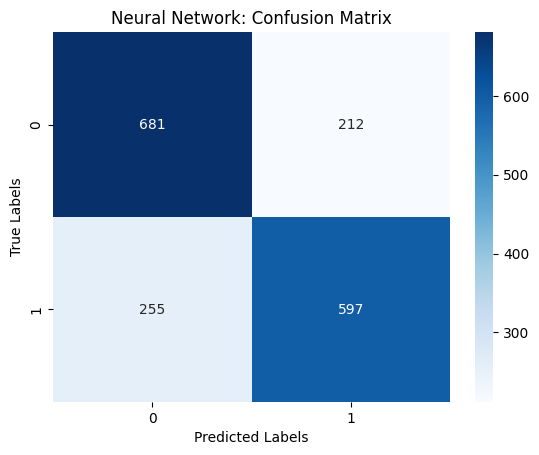

In [52]:
#evaluate the model
y_pred_nn = (nn_opt.predict(X_test) > 0.5).astype("int32")
evaluate(y_test, y_pred_nn, "Neural Network")


# Voting with threshold

1. Obtain the probabilities for each model's predictions on a given sample.
2. Apply the threshold to determine if a model's predicted probability is above 70%.
3. Count the number of models whose predicted probability exceeds the threshold.
4. Make the final prediction based on the voting results.

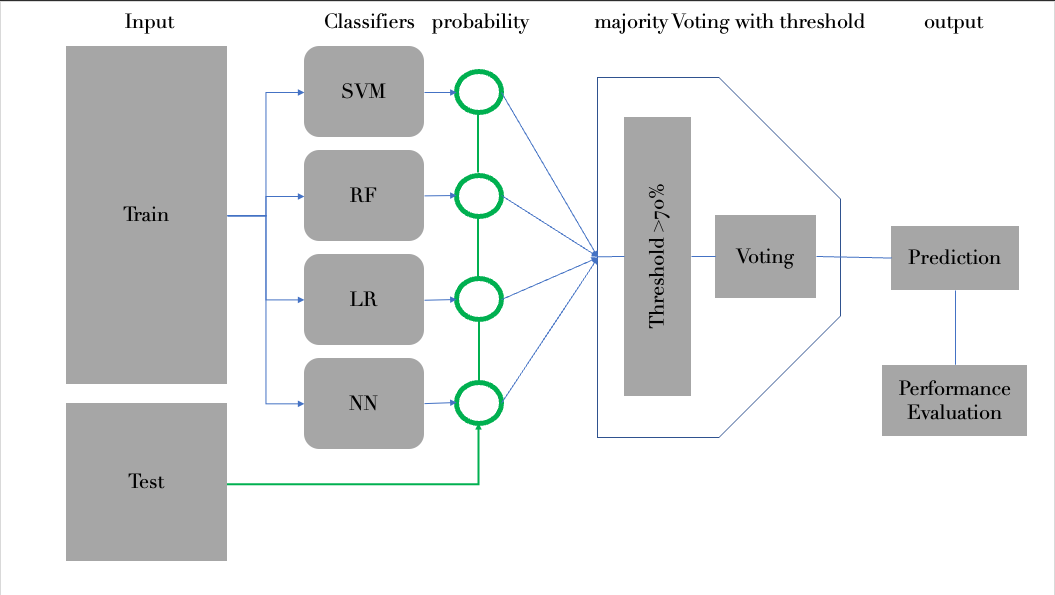


In [67]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Function that uses multiple models to vote on the classification of a sample
def model_probabilities(models, sample, threshold):

    model_votes = []  # List to store the probabilities from models that voted

    # Iterate over each model
    for model in models:
        # Check if the model has a "predict_proba" method
        if hasattr(model, "predict_proba"):
            probabilities = model.predict_proba(sample)  # Get predicted probabilities
            # because different models return differnet shapes of theit probabilities output we need to check the shape
            # If probabilities is a 1D array
            if probabilities.ndim == 1:
                predicted_probability = probabilities[1]  # Assume binary classification
            else:  # If probabilities is a 2D array ( in teh case for LogisticRegression)
                predicted_probability = probabilities[0, 1]  # Assume binary classification

        # Check if the model has a "decision_function" method
        elif hasattr(model, "decision_function"):
            predicted_score = model.decision_function(sample)  # Get decision function score
            predicted_probability = sigmoid(predicted_score)  # Apply sigmoid function to convert score to a probability
            # If predicted_probability is a 1D array
            if predicted_probability.ndim == 1 and len(predicted_probability) == 1:
                predicted_probability = predicted_probability[0]  # Convert to scalar
            elif predicted_probability.ndim > 1:
                predicted_probability = predicted_probability[0, 1]  # Assume binary classification

        else:
            # If the model has an output_shape attribute with more than one dimension and the second dimension is 1
            if len(model.output_shape) > 1 and model.output_shape[1] == 1:
                predicted_probabilities = model.predict(sample, verbose=0)  # Get predicted probabilities
                predicted_probability = predicted_probabilities[0, 0]  # Assume binary classification
            else:  # If the model doesn't have an output_shape attribute with more than one dimension and the second dimension is 1
                predicted_probabilities = model.predict(sample, verbose=0)  # Get predicted probabilities
                predicted_probability = predicted_probabilities[0, 1]  # Assume binary classification

        model_votes.append((model, predicted_probability))  # Add the model and its predicted probability to the list of model votes
    
    return model_votes  # Return the prediction and the votes of the models that voted

In [57]:
def actual_voting_algo(model_probs, threshold):
    # Initialize a counter for models with prediction probability above threshold
    count = 0

    # Loop over the model votes
    for model, predicted_probability in model_probs:
        # If the predicted probability is greater than the threshold
        if predicted_probability > threshold:
            # Increment the counter
            count += 1

    # If two or more models have a prediction probability higher than the threshold
    if count >= 2:
        return 1
    else:
        return 0
    
# Define the models
models = [grid_search_svm, lr_opt, rf_opt, nn_opt]
sample = X_test[0]  # Select the first sample from the test set
threshold = 0.7  # Set the probability threshold

# Use the voting function to predict the class of the sample
model_probs = model_probabilities(models, sample.reshape(1, -1), threshold) 

hlp.print_votes_and_prediction(model_probs, threshold)

1/1 [==============================] - 0s 13ms/step
Threshold: 0.7
Model Votes:


,Model,Probability
0,GridSearchCV,0.681122
1,LogisticRegression,0.707021
2,HalvingGridSearchCV,0.751557
3,Sequential,0.796927


## Optimizing Threshold for a given cost matrix

In [70]:
import numpy as np

def calculate_profit(TP, FP):
    # Define the rewards and penalties for each outcome
    profit_TP = 1000
    loss_FP = 3000

    # Calculate the profit
    profit = TP * profit_TP - FP * loss_FP
    
    return profit

import numpy as np

def expected_profit(models, X_test, y_test, threshold):
    # Select 200 random examples from the test set
    random_indices = np.random.choice(X_test.shape[0], size=1745, replace=False)
    random_examples = X_test[random_indices]
    actual_classes = y_test.iloc[random_indices.tolist()]

    # Initialize counters
    TP = 0 # True positives counter 
    FP = 0 # False positives counter 
    possible_profit = 0 # Counter for possible profit
    actual_profit = 0 # Counter for actual profit
    
    # Apply the voting function to each random example
    for i, example in enumerate(random_examples):
        model_probs = model_probabilities(models, example.reshape(1, -1), threshold)
        prediction = actual_voting_algo(model_probs, threshold)

        # Update the counters
        # If the prediction is correct and the actual class is 1 (loan is good) then increment TP by 1 
        if prediction == 1 and actual_classes.iloc[i] == 1:
            TP += 1
        # If the prediction is incorrect (loan is bad) and the actual class is 0 then increment FP by 1
        elif prediction == 1 and actual_classes.iloc[i] == 0:
            FP += 1

        # If the actual class is 1 (loan is good) then increment possible_profit by 2000 (potential profit)
        if actual_classes.iloc[i] == 1:
            possible_profit += 1000

    actual_profit = calculate_profit(TP, FP)

    return actual_profit, possible_profit, TP, FP

In [75]:
def find_optimal_threshold(models, X_test, y_test, start=0.6, stop=0.8, step=0.05):
    best_threshold = 0 
    best_profit = 0
    possible_profit = 0

    # Test various thresholds
    for threshold in np.arange(start, stop, step):
        actual_profit, possible_profit_temp, _, _ = expected_profit(models, X_test, y_test, threshold)
        print(f"After evaluating threshold (value={round(threshold,2)}), profit is {actual_profit}")

        if actual_profit > best_profit:
            best_profit = actual_profit
            possible_profit = possible_profit_temp
            best_threshold = threshold

    print(f"Optimal threshold: {round(best_threshold,2)}")
    print(f"Actual profit: {best_profit}$ / max. possible profit: {possible_profit}$ ({round((best_profit/possible_profit*100),2)}%)")

In [74]:
find_optimal_threshold(models, X_test, y_test)

After evaluating threshold (value=0.6), profit is 73000
After evaluating threshold (value=0.65), profit is 107000
After evaluating threshold (value=0.7000000000000001), profit is 142000
After evaluating threshold (value=0.7500000000000001), profit is 167000
After evaluating threshold (value=0.8000000000000002), profit is 141000
Optimal threshold: 0.75
Actual profit: 167000$ / max. possible profit: 852000$ (19.6%)


even more exact

In [ ]:
find_optimal_threshold(models, X_test, y_test, start=0.7, stop=0.75, step=0.01)

In [77]:
exsp_profit, poss_profit, TP, FP = expected_profit(models, X_test, y_test, 0.75)

print(f"Actual profit: {exsp_profit}$ / max. possible profit: {poss_profit}$ ({round((exsp_profit/poss_profit*100),2)}%)")
#print TP and FP in fsting
print(f"TP: {TP} / FP: {FP}")


Actual profit: 167000$ / max. possible profit: 852000$ (19.6%)
TP: 311 / FP: 48
